In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('data/gurgaon_properties_missing_value_imputation.csv')

In [3]:
df.shape

(3554, 18)

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [5]:
latlong = pd.read_csv('data/latlong.csv')

In [6]:
latlong

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"
...,...,...
124,sector 113,"28.5287° N, 77.0233° E"
125,sector 114,"28.5334° N, 77.0118° E"
126,sector 115,"28.5385° N, 77.0061° E"
127,gwal pahari,"28.4484° N, 77.0210° E"


In [7]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')

In [8]:
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [9]:
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [10]:
new_df = df.merge(latlong, on='sector')

In [11]:
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'coordinates', 'latitude', 'longitude'],
      dtype='object')

In [12]:
group_df = new_df.groupby('sector')[['price','price_per_sqft','built_up_area','latitude','longitude']].mean()

In [13]:
group_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3056.166667,28.4484,77.0210
manesar,0.962258,4608.064516,2027.367742,28.3515,76.9428
sector 1,1.860000,8249.833333,2327.833333,28.3663,76.9456
sector 10,2.092857,11866.571429,1908.857143,28.4537,77.0009
sector 102,1.696636,10603.822430,1556.130841,28.4750,76.9715
...,...,...,...,...,...
sector 91,1.648235,7586.117647,2028.647059,28.4014,76.9225
sector 92,0.934000,5928.290000,1571.341800,28.4079,76.9153
sector 93,0.848889,8009.888889,1017.000000,28.4153,76.9326


In [14]:
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

![title](data/image-1.png)

In [15]:
new_df.to_csv('data/data_viz1.csv',index=False)

In [16]:
df1 = pd.read_csv('data/gurgaon_properties.csv')

In [17]:
df1.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,4 BHK Flat in Sector 69 Gurgaon,flat,tulip violet,1.90,9452.0,2010.0,Super Built up area 2010(186.74 sq.m.)Carpet a...,4,4,2,store room,"Sector 69 Gurgaon, Gurgaon, Haryana",6.0,West,1 to 5 Year Old,"['Airia Mall Sector 68', 'Southern Peripheral ...",This 4 bhk apartment is available for sale in ...,"['1 Exhaust Fan', '1 Modular Kitchen', 'No AC'...","['Water purifier', 'Centrally Air Conditioned'...","['Green Area5 out of 5', 'Construction4 out of..."
1,4 Bedroom House for sale in Palam Vihar,house,independent,6.00,20000.0,3000.0,Built Up area: 333 (278.43 sq.m.),4,4,1,not available,"Palam Vihar, Palam Vihar, Gurgaon, Haryana",2.0,NaN,1 to 5 Year Old,NaN,4bhk villa for resale in palam vihar palam vih...,NaN,NaN,"['Environment5 out of 5', 'Lifestyle5 out of 5..."
2,3 BHK Flat in Sector 52 Gurgaon,flat,shree kirpalu gi sector 52,1.45,7631.0,1900.0,Super Built up area 1900(176.52 sq.m.)Built Up...,3,3,3+,others,"Gurgaon, Sector 52 Gurgaon, Gurgaon, Haryana",7.0,West,1 to 5 Year Old,"['Sector 54 chowk metro station', 'Sector metr...",Brokers please excuse. Located in the popular ...,"['4 Fan', '1 Exhaust Fan', '3 Geyser', '21 Lig...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Environment4 out of 5', 'Lifestyle5 out of 5..."
3,4 BHK Flat in Sector 69 Gurgaon,flat,tulip violet,1.90,9452.0,2010.0,Super Built up area 2010(186.74 sq.m.),4,4,2,not available,"Sector 69 Gurgaon, Gurgaon, Haryana",0.0,South-West,1 to 5 Year Old,"['Airia Mall Sector 68', 'Southern Peripheral ...",This lovely 4 bhk apartment/flat with extended...,"['1 Modular Kitchen', 'No AC', 'No Bed', 'No C...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Green Area5 out of 5', 'Construction4 out of..."
4,2 BHK Flat in Sohna,flat,mvn athens,0.25,5198.0,481.0,Built Up area: 481 (44.69 sq.m.),2,2,0,not available,"Sohna Sector 5, Sohna, Gurgaon, Haryana",0.0,NaN,1 to 5 Year Old,"['SBI ATM', 'Axis bank ATM', 'UCO bank ATM', '...",Best in class property available at sector 5 s...,"['3 Fan', '5 Light', '1 Modular Kitchen', 'No ...","['Security / Fire Alarm', 'Lift(s)', 'Maintena...","['Green Area4 out of 5', 'Construction4 out of..."


In [18]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]

In [19]:
wordcloud_df.head()

,features,sector
0,"['Water purifier', 'Centrally Air Conditioned'...",sector 36
1,NaN,sector 89
2,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",sohna road
3,"['Feng Shui / Vaastu Compliant', 'Security / F...",sector 92
4,"['Security / Fire Alarm', 'Lift(s)', 'Maintena...",sector 102


In [20]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [21]:
main

['Water purifier',
 'Centrally Air Conditioned',
 'Security / Fire Alarm',
 'Power Back-up',
 'Feng Shui / Vaastu Compliant',
 'Private Garden / Terrace',
 'Intercom Facility',
 'Lift(s)',
 'High Ceiling Height',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'Water Storage',
 'Separate entry for servant room',
 'No open drainage around',
 'Bank Attached Property',
 'Piped-gas',
 'Internet/wi-fi connectivity',
 'Recently Renovated',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Natural Light',
 'Airy Rooms',
 'Spacious Interiors',
 'Low Density Society',
 'Waste Disposal',
 'Rain Water Harvesting',
 'Water softening plant',
 'Shopping Centre',
 'Fitness Centre / GYM',
 'Club house / Community Center',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'High Ceiling Height',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'Water Storage',
 'No open drainage around',
 'Bank Attached Property',
 'Recently Renovated'

In [22]:
from wordcloud import WordCloud

In [23]:
feature_text = ' '.join(main)

In [24]:
import pickle
pickle.dump(feature_text, open('data/feature_text.pkl','wb'))

In [25]:
feature_text

'Water purifier Centrally Air Conditioned Security / Fire Alarm Power Back-up Feng Shui / Vaastu Compliant Private Garden / Terrace Intercom Facility Lift(s) High Ceiling Height Maintenance Staff False Ceiling Lighting Water Storage Separate entry for servant room No open drainage around Bank Attached Property Piped-gas Internet/wi-fi connectivity Recently Renovated Visitor Parking Swimming Pool Park Security Personnel Natural Light Airy Rooms Spacious Interiors Low Density Society Waste Disposal Rain Water Harvesting Water softening plant Shopping Centre Fitness Centre / GYM Club house / Community Center Security / Fire Alarm Feng Shui / Vaastu Compliant Intercom Facility Lift(s) High Ceiling Height Maintenance Staff False Ceiling Lighting Water Storage No open drainage around Bank Attached Property Recently Renovated Piped-gas Visitor Parking Park Security Personnel Natural Light Internet/wi-fi connectivity Low Density Society Shopping Centre Waste Disposal Rain Water Harvesting Wate

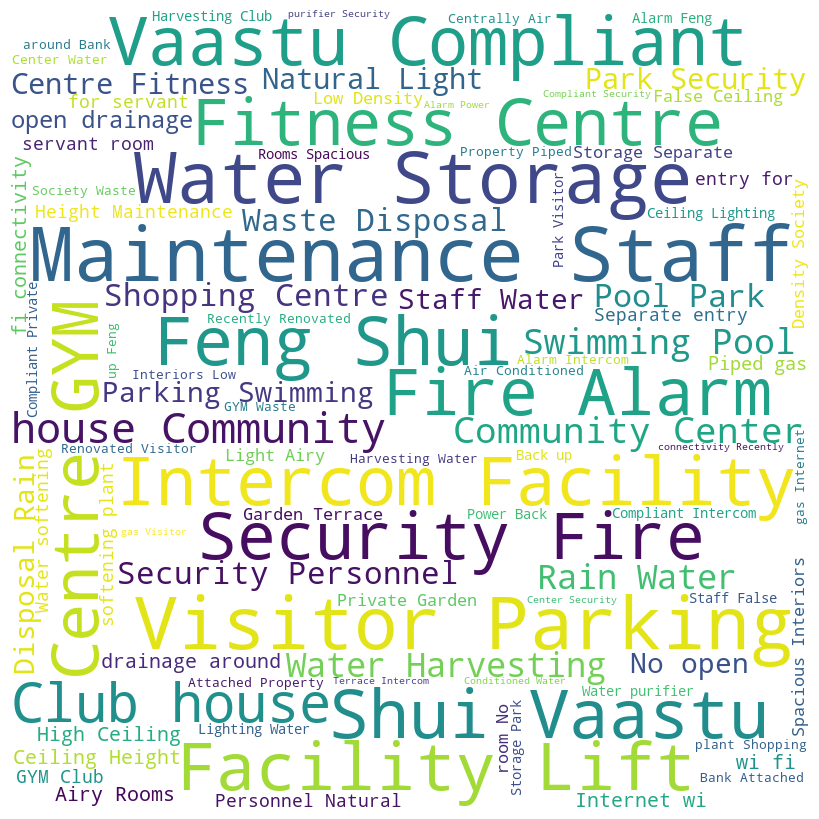

In [26]:
plt.rcParams["font.family"] = "Arial"

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(feature_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() # st.pyplot()

In [27]:
# !pip install --upgrade nbformat

In [28]:
data = dict(
    names=["A", "B", "C", "D", "E", "F"],
    parents=["", "", "", "A", "A", "C"],
    values=[10, 20, 30, 40, 50, 60],
)

fig = px.sunburst(
    df1,
    names='property_type',
    values='price_per_sqft',
    parents='bedRoom',
    title="Sample Sunburst Chart"
)
fig.show()

In [29]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

In [30]:
fig = px.pie(df, names='bedRoom', title='Total Bill Amount by Day')

# Show the plot
fig.show()

In [31]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()


g:\Anaji-23\Real-Estate-app_Streamlit\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

g:\Anaji-23\Real-Estate-app_Streamlit\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



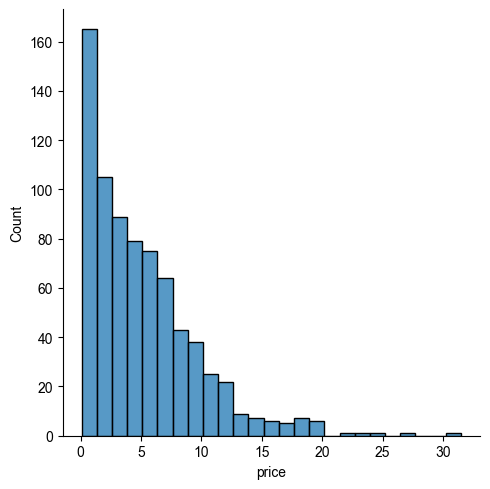

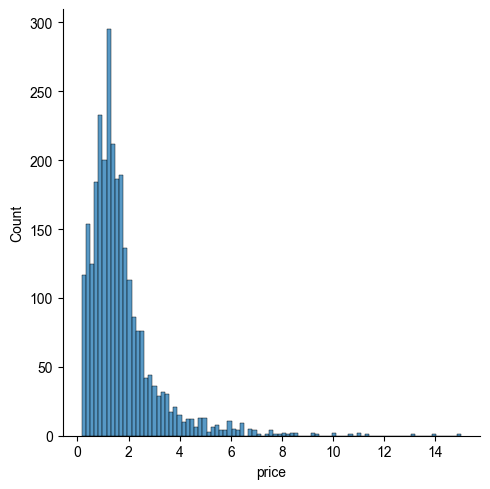

In [34]:
sns.displot(df[df['property_type'] == 'house']['price'])
sns.displot(df[df['property_type'] == 'flat']['price'])

In [33]:
new_df['sector'].unique().tolist().insert(0,'overall')